In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url
from matplotlib.ticker import StrMethodFormatter

In [57]:
def get_data(sql_db, query):
    url = get_db_url(sql_db)

    df = pd.read_sql(query, url)
    df.to_csv(f'{sql_db}.csv')

    return df

In [58]:
def clean_data(df):
    return df

In [59]:
def wrangle_zillow():
    sql_db = "zillow"
    query = '''
            SELECT
                bedroomcnt,
                bathroomcnt,
                calculatedfinishedsquarefeet,
                taxvaluedollarcnt,
                yearbuilt,
                taxamount,
                fips,
                propertylandusedesc
            FROM 
                properties_2017
                JOIN 
                    propertylandusetype USING(propertylandusetypeid)
            WHERE 
                propertylandusedesc = 'Single Family Residential';
            '''
    df=get_data(sql_db,query)
    return df

<hr style="border:2px solid gray">

In [216]:
df=wrangle_zillow()

In [217]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips',
       'propertylandusedesc'],
      dtype='object')

In [218]:
df.shape

(2152863, 8)

In [219]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusedesc           object 
dtypes: float64(7), object(1)
memory usage: 131.4+ MB


In [221]:
nulls=df.isnull().sum()

In [222]:
nulls

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
propertylandusedesc                0
dtype: int64

In [223]:
df[df['bedroomcnt'].isna()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0,Single Family Residential
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0,Single Family Residential
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0,Single Family Residential
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0,Single Family Residential
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0,Single Family Residential
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0,Single Family Residential
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0,Single Family Residential
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0,Single Family Residential
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0,Single Family Residential
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0,Single Family Residential


In [224]:
df = df.dropna()
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusedesc             0
dtype: int64

In [225]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,Single Family Residential
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,Single Family Residential
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,Single Family Residential
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,Single Family Residential
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,Single Family Residential


In [233]:
df['fips'] = df['fips'].apply(str)

In [227]:
df['yearbuilt'] = df['yearbuilt'].apply(int)

In [228]:
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                         int64
taxamount                       float64
fips                             object
propertylandusedesc              object
dtype: object

In [234]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc
4,4.0,2.0,3633.0,296425.0,2005,6941.39,6037.0,Single Family Residential
6,3.0,4.0,1620.0,847770.0,2011,10244.94,6037.0,Single Family Residential
7,3.0,2.0,2077.0,646760.0,1926,7924.68,6037.0,Single Family Residential
11,0.0,0.0,1200.0,5328.0,1972,91.60,6037.0,Single Family Residential
14,0.0,0.0,171.0,6920.0,1973,255.17,6037.0,Single Family Residential


In [235]:
df['fips'] = '0' + df['fips']

In [236]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc
4,4.0,2.0,3633.0,296425.0,2005,6941.39,06037.0,Single Family Residential
6,3.0,4.0,1620.0,847770.0,2011,10244.94,06037.0,Single Family Residential
7,3.0,2.0,2077.0,646760.0,1926,7924.68,06037.0,Single Family Residential
11,0.0,0.0,1200.0,5328.0,1972,91.60,06037.0,Single Family Residential
14,0.0,0.0,171.0,6920.0,1973,255.17,06037.0,Single Family Residential


In [244]:
df['fips']=df['fips'].str[:-2]

In [245]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc
4,4.0,2.0,3633.0,296425.0,2005,6941.39,06037,Single Family Residential
6,3.0,4.0,1620.0,847770.0,2011,10244.94,06037,Single Family Residential
7,3.0,2.0,2077.0,646760.0,1926,7924.68,06037,Single Family Residential
11,0.0,0.0,1200.0,5328.0,1972,91.60,06037,Single Family Residential
14,0.0,0.0,171.0,6920.0,1973,255.17,06037,Single Family Residential


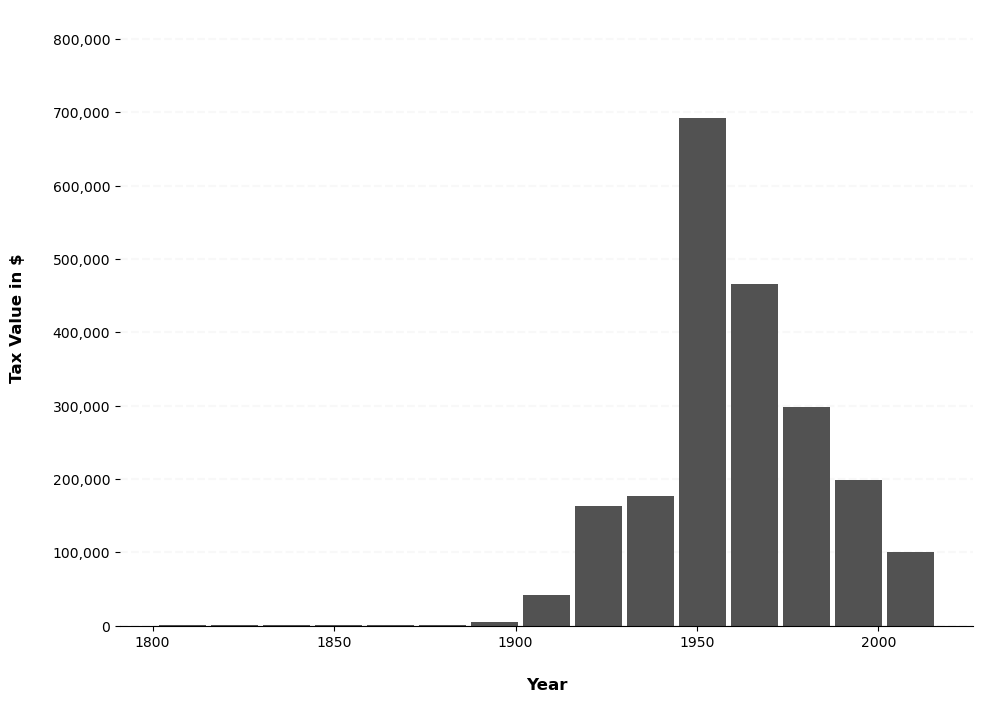

In [246]:
ax = df.hist(column='yearbuilt', bins=15, grid=False, figsize=(11,8), color='#525252', zorder=2, rwidth=.9)
ax = ax[0]

for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
    # No Ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set x-axis label
    x.set_xlabel("Year", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Tax Value in $", labelpad=20, weight='bold', size=12)
    
    # Commas y-axis
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))